# SI 618 Day 11: Classification

Version 2021.04.04.1.CT

Today we're going to focus on classification and model evaluation. 

In [1]:
import seaborn as sns
import pandas as pd

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data = sns.load_dataset('iris')
data.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [45]:
from sklearn.model_selection import train_test_split
# "target" contains the column name of the classification labels
target = "species"

X = data.drop(target,axis=1)
y = data[target]

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

## Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = y_pred 


In [48]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa'], dtype='<U10')

In [49]:
y_test.values

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa'], dtype=object)

$accuracy = \frac{True Positives + True Negatives}{All Samples}$

$precision = \frac{True Positives}{True Positives + False Positives}$

$recall = \frac{True Positives}{True Positives + False Negatives}$

$F1 = \frac{2 \times (Precision \times Recall)}{Precision + Recall}$

In [51]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 90.00%
[[14  0  0]
 [ 0 15  3]
 [ 0  2 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      0.83      0.86        18
   virginica       0.84      0.89      0.86        18

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.91        50
weighted avg       0.90      0.90      0.90        50



## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear',multi_class="auto")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9
[[14  0  0]
 [ 0 14  4]
 [ 0  1 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.93      0.78      0.85        18
   virginica       0.81      0.94      0.87        18

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.91        50
weighted avg       0.91      0.90      0.90        50



## Support Vector Machines

In [53]:
from sklearn import svm
model = svm.SVC(gamma="scale",kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9
[[14  0  0]
 [ 0 17  1]
 [ 0  4 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.81      0.94      0.87        18
   virginica       0.93      0.78      0.85        18

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.91        50
weighted avg       0.91      0.90      0.90        50



## Decision Trees

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Image

In [67]:
model = DecisionTreeClassifier(
    random_state=3, 
    criterion='entropy',
    splitter='best', 
    max_depth=3, 
    min_samples_split=2)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# evaluate predictions
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.00%


In [68]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

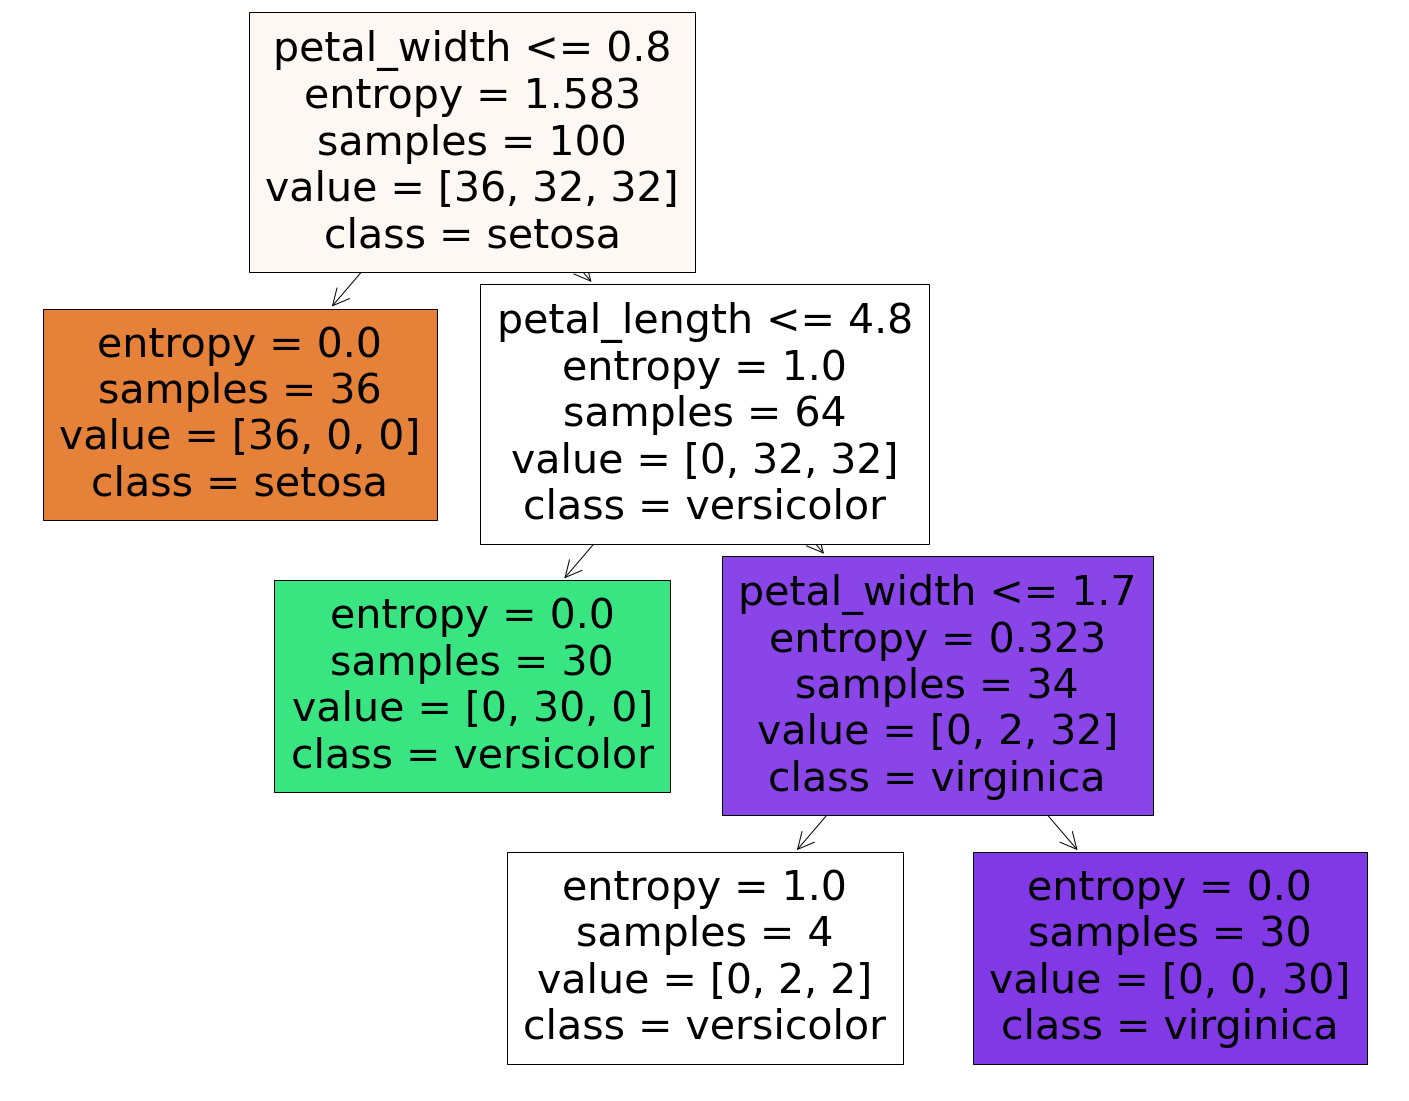

In [69]:
# based on https://mljar.com/blog/visualize-decision-tree/
fig = plt.figure(figsize=(25,20))
# we use '_' to capture the return from plot_tree(...) and never do anything with it
_ = plot_tree(model, 
                   feature_names=X.columns,  # ordered list of features
                   class_names=y.unique(), # unique() is handy here due to numerical sorting of classes
                   filled=True)

In [70]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9
[[14  0  0]
 [ 0 16  2]
 [ 0  3 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.84      0.89      0.86        18
   virginica       0.88      0.83      0.86        18

    accuracy                           0.90        50
   macro avg       0.91      0.91      0.91        50
weighted avg       0.90      0.90      0.90        50



## Random Forests

In [92]:
seed = 42

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(
    n_estimators=100,
    #random_state=seed, 
    criterion='entropy',
    max_depth=None, 
    min_samples_split=2)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# evaluate predictions
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.00%


In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 16  2]
 [ 0  2 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.89      0.89      0.89        18
   virginica       0.89      0.89      0.89        18

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.93        50
weighted avg       0.92      0.92      0.92        50



<AxesSubplot:>

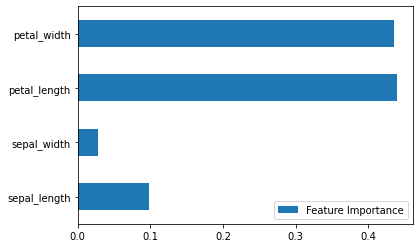

In [74]:
# Check feature importance
feat_importance = model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=list(X)).plot(kind='barh')

##  Cross-validation



In [93]:
model

RandomForestClassifier(criterion='entropy')


### Tuning the model
The model paramters are called _hyperparameters_.  Setting them to appropriate values and running the model experiment again can be tedious, so we have a technique called cross-validation to help with this.

From http://scikit-learn.org/stable/modules/cross_validation.html:

> When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

> However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

> A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

> A model is trained using  of the folds as training data;
the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

The mean score and the 95% confidence interval (2 x the standard deviation) of the score estimate are hence given by:


In [94]:
model

RandomForestClassifier(criterion='entropy')

In [96]:
y


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [97]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y, cv=5, n_jobs=-1)
print("Accuracy: %0.2f%% (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2*100))

Accuracy: 96.00% (+/- 4.99)


In [100]:
scores.mean() *100

96.0

In [103]:
scores.std()*2 *100

4.988876515698587

But let's say we want to fiddle with the hyperparameters.

To do this, we first set up a parameter grid with the lists of paramters we want to try:

In [ ]:
RandomForestClassifier()

In [104]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 50, 100],
                 'max_depth': [2, 5, 7, 9],
             }

In [106]:
type(param_grid)

dict

We now run the cross-validation on the classifier. Note: this will take a while (why?).

In [107]:
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(model, param_grid, cv=10, n_jobs=-1)
grid_clf.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 50,
                                          100]})

In [108]:
grid_clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=5)

In [109]:
grid_clf.best_params_

{'max_depth': 5, 'n_estimators': 5}

In [112]:
# Details, which can be imported into a pandas dataframe:
results = pd.DataFrame(grid_clf.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037361,0.010851,0.010207,0.004607,2,5,"{'max_depth': 2, 'n_estimators': 5}",1.000000,0.933333,1.0,0.933333,0.933333,0.866667,0.866667,1.000000,1.0,1.0,0.953333,0.052068,24
1,0.065582,0.013262,0.014379,0.006908,2,10,"{'max_depth': 2, 'n_estimators': 10}",1.000000,0.933333,1.0,0.933333,0.933333,0.866667,0.800000,1.000000,1.0,1.0,0.946667,0.065320,30
2,0.095841,0.010514,0.021096,0.013085,2,15,"{'max_depth': 2, 'n_estimators': 15}",0.933333,0.933333,1.0,0.933333,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.953333,0.042687,24
3,0.139398,0.026297,0.020184,0.014980,2,20,"{'max_depth': 2, 'n_estimators': 20}",0.933333,0.933333,1.0,0.933333,0.866667,0.933333,0.866667,1.000000,1.0,1.0,0.946667,0.049889,30
4,0.130452,0.019103,0.018192,0.007104,2,25,"{'max_depth': 2, 'n_estimators': 25}",0.933333,0.933333,1.0,0.933333,0.933333,0.933333,0.866667,0.933333,1.0,1.0,0.946667,0.040000,30


In [140]:
model = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=5
model = grid_clf.best_estimator_

In [141]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f)" % (scores.mean()*100, scores.std() * 2*100))

Accuracy: 95.33% (+/- 8.54)


## Task
Recall the `penguins` dataset from earlier in the course.  Choosing from Naive Bayes, Logistic Regression, Support Vector Machines, Decision Trees and Random Forests, find the "best" classifier to classify penguin species.  Note that you can set up your code to run one classifier, and then change only the classified specification and keep the rest of the code the same.

In [113]:
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)

In [115]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [114]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [116]:
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [117]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(penguins, penguins['species']):
    penguins_train_set = penguins.loc[penguins.index.intersection(train_index)]
    penguins_test_set = penguins.loc[penguins.index.intersection(test_index)]

In [118]:
penguins_train_set.shape,penguins_test_set.shape

((257, 7), (67, 7))

In [119]:
penguins_train_set.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female


In [120]:
penguins_train_X = penguins_train_set.drop('species',axis=1)
penguins_train_y = penguins_train_set['species'].copy()
penguins_test_X = penguins_test_set.drop('species',axis=1)
penguins_test_y = penguins_test_set[['species']].copy()

In [121]:

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(penguins_train_X.select_dtypes(include=[np.number]))
cat_attribs = list(penguins_train_X.select_dtypes(exclude=[np.number]))

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

full_pipeline.fit(penguins_train_X)
penguins_train_X_prepared = full_pipeline.transform(penguins_train_X)
penguins_test_X_prepared = full_pipeline.transform(penguins_test_X)

In [123]:
penguins_train_X_prepared

array([[-0.90362753,  0.73844492, -1.42365611, ...,  1.        ,
         0.        ,  1.        ],
       [-0.68220791,  0.38718569, -0.40205366, ...,  1.        ,
         1.        ,  0.        ],
       [-1.34646676,  1.03952426, -0.54799687, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 1.19985883, -1.01785124,  1.13035001, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.07069739, -0.666592  ,  2.07898086, ...,  0.        ,
         0.        ,  1.        ],
       [-0.0917556 , -1.01785124,  0.9114352 , ...,  0.        ,
         1.        ,  0.        ]])

In [122]:
penguins_train_X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Torgersen,38.9,17.8,181.0,3625.0,Female
...,...,...,...,...,...,...
328,Biscoe,43.3,14.0,208.0,4575.0,Female
329,Biscoe,48.1,15.1,209.0,5500.0,Male
330,Biscoe,50.5,15.2,216.0,5000.0,Female
331,Biscoe,49.8,15.9,229.0,5950.0,Male


In [126]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [127]:
# from https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    ]

In [128]:
X_train = penguins_train_X_prepared
y_train = penguins_train_y
X_test = penguins_test_X_prepared
y_test = penguins_test_y

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # evaluate predictions
    accuracy = clf.score(X_test, y_test)
    print("%s Accuracy: %.2f%%" % (name,accuracy * 100.0))

Nearest Neighbors Accuracy: 97.01%
Linear SVM Accuracy: 95.52%
RBF SVM Accuracy: 94.03%
Gaussian Process Accuracy: 98.51%
Decision Tree Accuracy: 95.52%
Random Forest Accuracy: 97.01%
Neural Net Accuracy: 98.51%
AdaBoost Accuracy: 79.10%
Naive Bayes Accuracy: 70.15%


Let's define a classifier that always classifies a species as "not Chinstrap":

In [129]:
from sklearn.base import BaseEstimator

class NeverChinstrapClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [130]:
penguins_train_y

0      Adelie
2      Adelie
4      Adelie
5      Adelie
6      Adelie
        ...  
328    Gentoo
329    Gentoo
330    Gentoo
331    Gentoo
332    Gentoo
Name: species, Length: 257, dtype: object

In [131]:
y_train_chinstrap = penguins_train_y == 'Chinstrap'

In [132]:
y_train_chinstrap

0      False
2      False
4      False
5      False
6      False
       ...  
328    False
329    False
330    False
331    False
332    False
Name: species, Length: 257, dtype: bool

In [133]:
y_train_chinstrap.sum()

53

In [136]:
from sklearn.model_selection import cross_val_score
never_chinstrap_clf = NeverChinstrapClassifier()
cvs = cross_val_score(never_chinstrap_clf,penguins_train_X_prepared,y_train_chinstrap,cv=5,scoring='accuracy')
cvs

array([1.        , 1.        , 0.23529412, 0.7254902 , 1.        ])

In [137]:
np.mean(cvs)

0.7921568627450981

In [139]:
y_train_chinstrap.sum()/len(y_train_chinstrap)

0.20622568093385213

Let's take a look at some additional ways to assess how good a model (classifier) is:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#hasattr(forest_clf, "predict_proba")

In [ ]:
#hasattr(forest_clf, "decision_function")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
forest_clf = RandomForestClassifier(n_estimators=100,max_depth=3,random_state=42)

y_probas_forest = cross_val_predict(forest_clf, penguins_train_X_prepared, y_train_chinstrap, cv=3,
                                    method="predict_proba")

In [ ]:
y_train_pred = cross_val_predict(forest_clf, penguins_train_X_prepared, y_train_chinstrap, cv=3)

In [ ]:
confusion_matrix(y_train_pred,y_train_chinstrap)

In [ ]:
y_probas_forest

In [ ]:
from sklearn.metrics import roc_curve
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_chinstrap,y_scores_forest)#,pos_label='Male')

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_chinstrap,y_scores_forest)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
#    plt.axis([0, 3, 0, 1]) 
#recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
#threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 

In [ ]:
threshold_90_precision

In [ ]:
y_train_pred_90 = (y_scores_forest >= threshold_90_precision)

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_chinstrap, y_train_pred_90))
print(recall_score(y_train_chinstrap, y_train_pred_90))

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=14) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=14)    # Not shown
    plt.grid(True)                                            # Not shown

plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_chinstrap, y_scores_forest)